# ***Classification Problem***

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The original dataset is from the Kaggle. Please download the dataset from the link below.

https://www.kaggle.com/aljarah/xAPI-Edu-Data

# Importing the Libraries

In [9]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import numpy as np
#Libraries for importing functions for evaluating the performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
# importing the libraries for grid search
from sklearn.model_selection import GridSearchCV

# Importing the Dataset

In [10]:
dataset = pd.read_csv("/content/drive/My Drive/Classification/Edu.csv")

# Exploring the Dataset

In [11]:
#printing the first fice rows of the dataset
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [12]:
#printing the details about the dataset - Column names and number of rows
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

As you can see, we have 480 rows and 17 columns.
Unfortunately, its a mixture of both numerical and categorical values :(

In [13]:
#Checking the dataset if it contains any null values in the columns
dataset_null_values_info = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
dataset_null_values_info.columns = ['Count of the Null Values']
dataset_null_values_info.index.name = 'Column Name'
print(dataset_null_values_info)

                          Count of the Null Values
Column Name                                       
Class                                            0
Semester                                         0
NationalITy                                      0
PlaceofBirth                                     0
StageID                                          0
GradeID                                          0
SectionID                                        0
Topic                                            0
Relation                                         0
StudentAbsenceDays                               0
raisedhands                                      0
VisITedResources                                 0
AnnouncementsView                                0
Discussion                                       0
ParentAnsweringSurvey                            0
ParentschoolSatisfaction                         0
gender                                           0


Great! We don't have any missing values. The dataset is clean.

Target Variable is Class 

Rest all others are driver variables (16 columns)

In [14]:
# Checking the values in each categorical columns:
categorical_columns = dataset.select_dtypes(exclude=['int64']).columns
categorical_columns = dataset[categorical_columns]
for temp in categorical_columns.columns:
    print ("******%s******"%temp)
    print (categorical_columns[temp].value_counts())
    print('\n')


******gender******
M    305
F    175
Name: gender, dtype: int64


******NationalITy******
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64


******PlaceofBirth******
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Tunis            9
Egypt            9
Syria            6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64


******StageID******
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64


******GradeID******
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64


****

Please check how the categorical columns are divided

In [15]:
# Showing summary stats for the numerical features
dataset.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [16]:
dataset['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

As you can see above, we have 3 categories in the target variable. 

Excited to see the distribution in the form of visualization. Check the code below!

# Data Visualization

Text(0.5, 1.0, 'Distribution of Class')

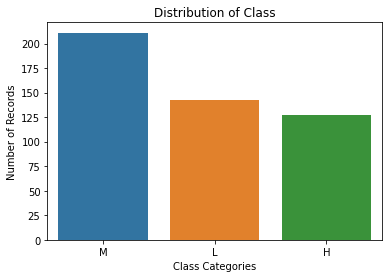

In [17]:
# Distribution of the categories in the target variable
sns.barplot(dataset['Class'].unique(),dataset['Class'].value_counts())
plt.xlabel("Class Categories")
plt.ylabel("Number of Records")
plt.title("Distribution of Class")

It seems that most of the values in the dataset belongs to category Medium - 'M'. 

The "Low" and "High" category has more or less same amount of Data

The Dataset is balanced and it is a normal distributed class set

Ok! Now lets explore the other categorical columns in the dataset

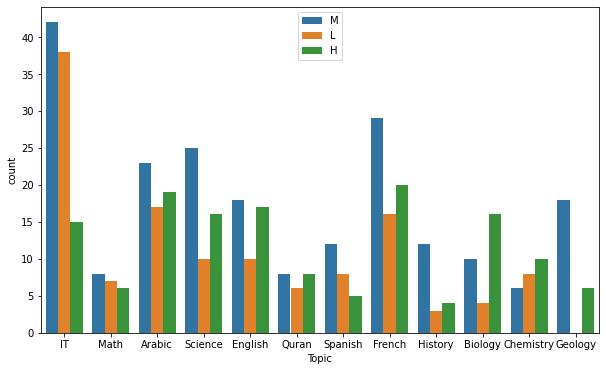

In [18]:
#Visualizing the data (Topic Vs Class)
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Topic', hue = 'Class', data = dataset)
plt.legend()

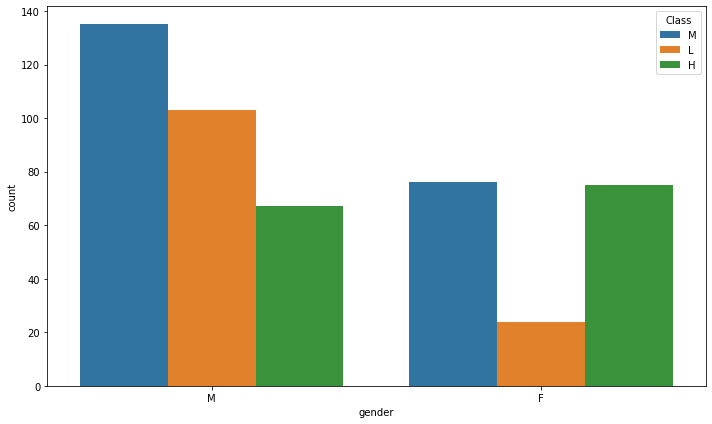

In [19]:
#Visualizing the data (Gender Vs Class)
fig = plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue = 'Class', data = dataset)
plt.tight_layout()


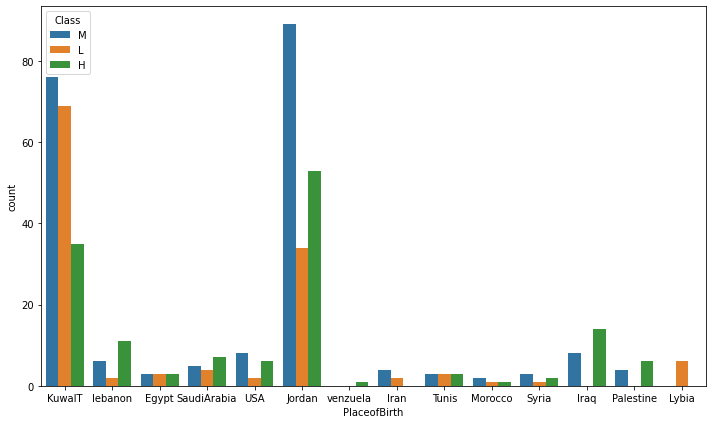

In [20]:
#Visualizing the data (PlaceofBirth Vs Class)
fig = plt.figure(figsize=(10,6))
sns.countplot(x='PlaceofBirth', hue = 'Class', data = dataset)
plt.tight_layout()

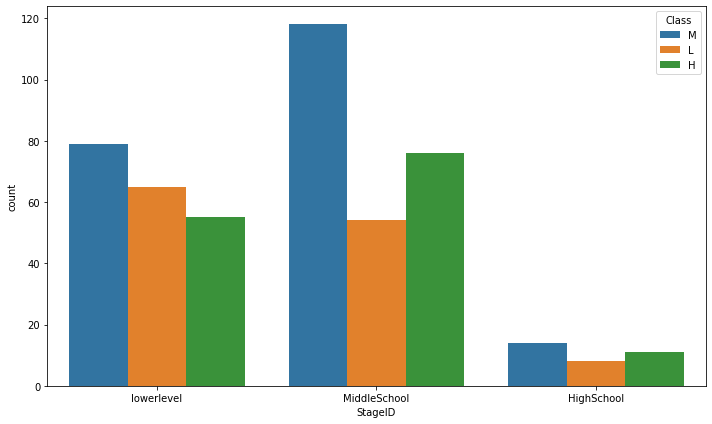

In [21]:
#Visualizing the data (StageID Vs Class)
fig = plt.figure(figsize=(10,6))
sns.countplot(x='StageID', hue = 'Class', data = dataset)
plt.tight_layout()

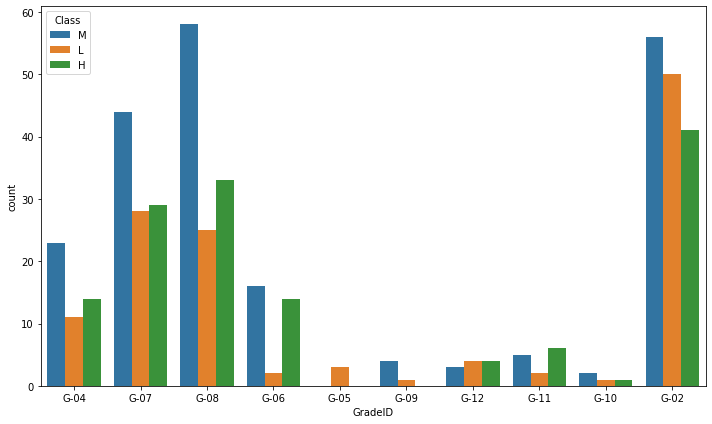

In [22]:
#Visualizing the data (GradeID Vs Class)
fig = plt.figure(figsize=(10,6))
sns.countplot(x='GradeID', hue = 'Class', data = dataset)
plt.tight_layout()

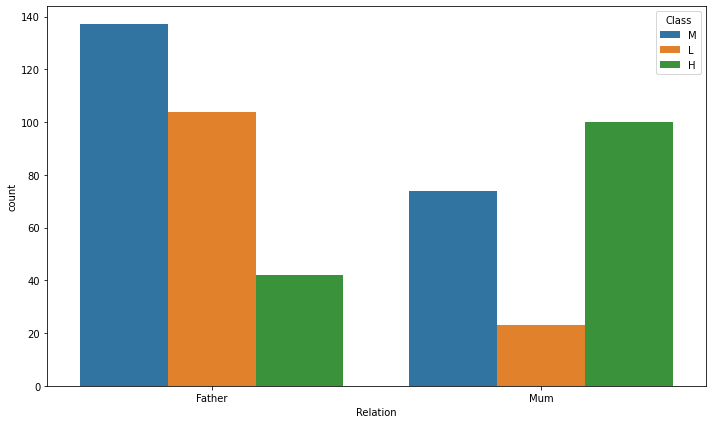

In [23]:
#Visualizing the data (Relation Vs Class)
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Relation', hue = 'Class', data = dataset)
plt.tight_layout()

Find the visualization of the correlation matrix for all the numerical variables (Only 4 columns) below to get some insight

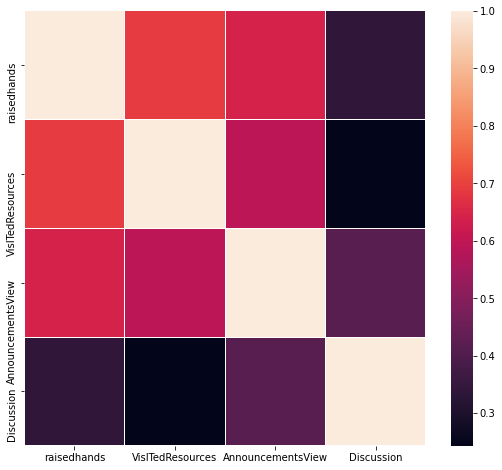

In [24]:
# Showing the corrleation matrix - for numerical values - For columns(RaisedHands, VisitedResources, AnnouncementsView and Discussion)
corrmat = dataset.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

It seems there is a high correlation between the visitedResources and RaisedHands

Ok! Enough of Visualization, lets work on the data now!

# Data Pre-Processing

Updating the target variable from the categorial values to numberical representation

low - 0, medium - 1, high - 2

1) low = "L"

2) medium = "M"

3) high = "H"

In [25]:
low = "L"
medium = "M"
high = "H"
## replace elements in list.
dataset['Class'].replace(to_replace = low , value = 0,inplace = True)
dataset['Class'].replace(to_replace = medium ,value = 1,inplace = True)
dataset['Class'].replace(to_replace = high ,value = 2,inplace = True)
dataset['Class'].value_counts()

1    211
2    142
0    127
Name: Class, dtype: int64

Good the target variable column are converted into numerical values

X contains the driver variables

Y contains the target variable

In [26]:
# Assigning the X and Y values
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

Check X and Y values Below

In [27]:
X

array([['M', 'KW', 'KuwaIT', ..., 'Yes', 'Good', 'Under-7'],
       ['M', 'KW', 'KuwaIT', ..., 'Yes', 'Good', 'Under-7'],
       ['M', 'KW', 'KuwaIT', ..., 'No', 'Bad', 'Above-7'],
       ...,
       ['F', 'Jordan', 'Jordan', ..., 'No', 'Bad', 'Under-7'],
       ['F', 'Jordan', 'Jordan', ..., 'No', 'Bad', 'Above-7'],
       ['F', 'Jordan', 'Jordan', ..., 'No', 'Bad', 'Above-7']],
      dtype=object)

In [28]:
Y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1,
       2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0,
       1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1,
       0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0,

Now convert all the categorical values in the driver variables into numerical values

In [29]:
#encoding the categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#label encoder for categorical variables
for i in range(0, len(dataset.columns) - 1):
    z = [9, 10, 11, 12]
    if i not in z: 
        labelencoder_x = LabelEncoder()
        X[:,i] = labelencoder_x.fit_transform(X[:,i])

Check the values in X now!

In [30]:
X

array([[1, 4, 4, ..., 1, 1, 1],
       [1, 4, 4, ..., 1, 1, 1],
       [1, 4, 4, ..., 0, 0, 0],
       ...,
       [0, 3, 3, ..., 0, 0, 1],
       [0, 3, 3, ..., 0, 0, 0],
       [0, 3, 3, ..., 0, 0, 0]], dtype=object)

X now only contains the numerical values

Find the Correlation between the variables. Check the visualization below for more insights!

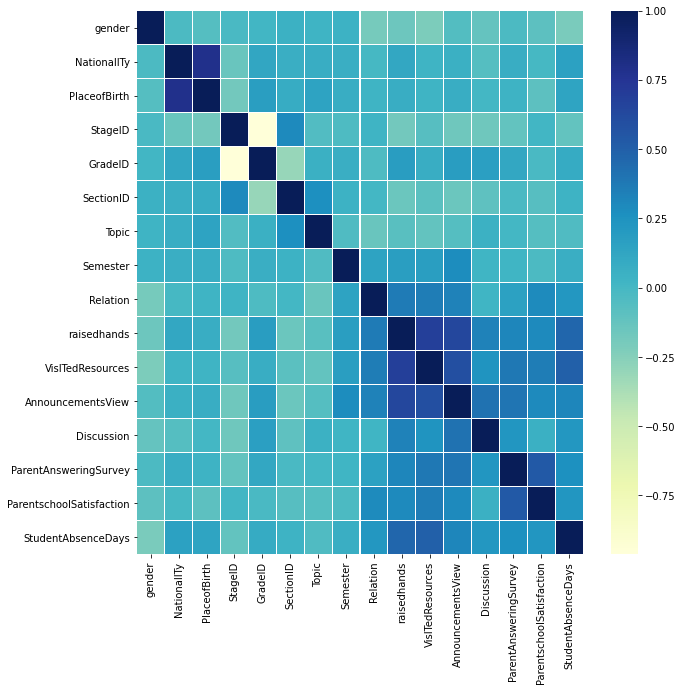

In [31]:
# Showing the corrleation matrix for all the values in X
columns = list(dataset.columns.values) 
columns.pop()
df = pd.DataFrame(data = X.astype(float), columns = columns)
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

PlaceofBirth and Nationality are highly correlated!

There is also a correlation between the columns RaisedHands, Visited Resources and AnnouncementsView.

Now find the correlation between each variable in the driver variables and the target variable using Pearsons Correlation

In [32]:
#To find the correlation between the driver variables and the target variable
temp=pd.DataFrame(columns=['Names','CorrValue'])
for i in range(0,16):
    corr, _ = sc.pearsonr(X[:,i],Y)
    temp=temp.append({"Names":dataset.columns[i], 
                    "CorrValue":abs(corr)}, ignore_index=True)
    print('Pearsons correlation: ',dataset.columns[i],' %.3f' % corr)
    
print(temp.sort_values('CorrValue', ascending=False))

Pearsons correlation:  gender  -0.263
Pearsons correlation:  NationalITy  0.095
Pearsons correlation:  PlaceofBirth  0.097
Pearsons correlation:  StageID  -0.084
Pearsons correlation:  GradeID  0.067
Pearsons correlation:  SectionID  -0.037
Pearsons correlation:  Topic  -0.094
Pearsons correlation:  Semester  0.126
Pearsons correlation:  Relation  0.401
Pearsons correlation:  raisedhands  0.646
Pearsons correlation:  VisITedResources  0.677
Pearsons correlation:  AnnouncementsView  0.527
Pearsons correlation:  Discussion  0.308
Pearsons correlation:  ParentAnsweringSurvey  0.435
Pearsons correlation:  ParentschoolSatisfaction  0.376
Pearsons correlation:  StudentAbsenceDays  0.671
                       Names  CorrValue
10          VisITedResources   0.677094
15        StudentAbsenceDays   0.671312
9                raisedhands   0.646298
11         AnnouncementsView   0.527370
13     ParentAnsweringSurvey   0.435495
8                   Relation   0.401142
14  ParentschoolSatisfaction  

Text(0, 0.5, 'Pearsons Correlation')

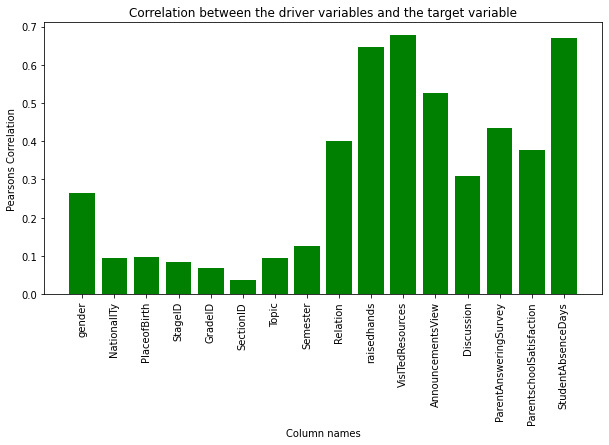

In [33]:
#Visualizing the results for the Pearsons correlation
X_grid = np.arange(0, 16)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.rcParams['figure.figsize'] = (10,5)
slt = plt.bar(temp['Names'], temp['CorrValue'], color = 'green')
plt.xticks(temp['Names'], rotation='vertical')
plt.title('Correlation between the driver variables and the target variable')
plt.xlabel('Column names')
plt.ylabel('Pearsons Correlation')

RaisedHands, VisitedResources and StudentAbsenceDays are the most important columns to predict the outcome "the score" of the student.

Further, apply one hot encoder to the categorial columns where they have more than two categories

In [34]:
import warnings
warnings.simplefilter('ignore')

In [35]:
# One hot encoder for categorical variables - X
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        
         OneHotEncoder(), 
         [1,2,3,4,5,6]              
         )
    ],
    remainder='passthrough'
)
X = transformer.fit_transform(X).toarray() 

In [36]:
X

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Appply Feature Scaling

In [37]:
#feature scaling - Only X
from sklearn.preprocessing import StandardScaler
standardscalar_x = StandardScaler()
X = standardscalar_x.fit_transform(X)

In [38]:
X

array([[-0.1382327 , -0.11250879, -0.21916874, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [-0.1382327 , -0.11250879, -0.21916874, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [-0.1382327 , -0.11250879, -0.21916874, ..., -1.13389342,
        -1.24627103, -1.23007683],
       ...,
       [-0.1382327 , -0.11250879, -0.21916874, ..., -1.13389342,
        -1.24627103,  0.81295735],
       [-0.1382327 , -0.11250879, -0.21916874, ..., -1.13389342,
        -1.24627103, -1.23007683],
       [-0.1382327 , -0.11250879, -0.21916874, ..., -1.13389342,
        -1.24627103, -1.23007683]])

# Split the dataset

In [39]:
#Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Machine Learning Classification Algorithms

# 1. Logistic Regression 

In [40]:
#apply the Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict the Y value using the classifier

In [41]:
#predict the Y value
pred_Y = classifier.predict(test_X)

Evaluate the model

In [42]:
#Evaluation
#confusion matrix
cm_logistic_regression = confusion_matrix(test_Y, pred_Y)
print(cm_logistic_regression)

[[22  1  0]
 [ 4 34  7]
 [ 0 11 17]]


Check the confusion matrix above. The diagonal values are the success rate. The counts 22, 31 and 12. Around 65 values are predicted right and 31 values are predicted wrong.

In [43]:
#Precision, recall, F1-score and support
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.74      0.76      0.75        45
           2       0.71      0.61      0.65        28

    accuracy                           0.76        96
   macro avg       0.76      0.77      0.77        96
weighted avg       0.76      0.76      0.76        96



In [44]:
#Accuracy
print('Accuracy score for Logistic Regression: ', format(accuracy_score(test_Y, pred_Y)))

Accuracy score for Logistic Regression:  0.7604166666666666


Now we can try Grid Search to increase the performance of the model

In [45]:
parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(train_X,train_Y)
grid_predictions = grid_search.predict(test_X)

In [46]:
#confusion matrix for grid search predictions
print(confusion_matrix(test_Y,grid_predictions))

[[22  1  0]
 [ 4 38  3]
 [ 0 16 12]]


In [47]:
#Precision, recall, F1-score and support
print(classification_report(test_Y,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.69      0.84      0.76        45
           2       0.80      0.43      0.56        28

    accuracy                           0.75        96
   macro avg       0.78      0.74      0.74        96
weighted avg       0.76      0.75      0.73        96



In [48]:
print("Best Parameters for Logistic Regression: ", grid_search.best_estimator_)

Best Parameters for Logistic Regression:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [49]:
print("Best Score for Logistic Regression: ", grid_search.best_score_)

Best Score for Logistic Regression:  0.7445317840054683


# 2. K-NN

In [50]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
#predict the Y value
pred_Y = classifier.predict(test_X)

In [52]:
#Evaluation
#confusion matrix
cm_knn = confusion_matrix(test_Y, pred_Y)
print(cm_knn)

[[19  4  0]
 [11 25  9]
 [ 5 17  6]]


In [53]:
#Precision, recall, F1-score and support
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       0.54      0.83      0.66        23
           1       0.54      0.56      0.55        45
           2       0.40      0.21      0.28        28

    accuracy                           0.52        96
   macro avg       0.50      0.53      0.49        96
weighted avg       0.50      0.52      0.50        96



In [54]:
#Accuracy
print('Accuracy score for K-NN: ', format(accuracy_score(test_Y, pred_Y)))

Accuracy score for K-NN:  0.5208333333333334


# 3. SVM

In [55]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_X,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
#predict the Y value
pred_Y = classifier.predict(test_X)

In [57]:
#Evaluation
#confusion matrix
cm_svm = confusion_matrix(test_Y, pred_Y)
print(cm_svm)

[[21  2  0]
 [ 5 31  9]
 [ 0 18 10]]


In [58]:
#Precision, recall, F1-score and support
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.61      0.69      0.65        45
           2       0.53      0.36      0.43        28

    accuracy                           0.65        96
   macro avg       0.65      0.65      0.64        96
weighted avg       0.63      0.65      0.63        96



In [59]:
#Accuracy
print('Accuracy score for SVM: ', format(accuracy_score(test_Y, pred_Y)))

Accuracy score for SVM:  0.6458333333333334


Now we can try Grid Search to increase the performance of the model

In [60]:
# grid Search to increase the performance
# implementing grid search to find the performance for different kernels
parameters = {'kernel':('linear', 'rbf', 'poly','sigmoid')}
clf = GridSearchCV(SVC(), parameters)
clf.fit(train_X,train_Y)
clf.cv_results_

{'mean_fit_time': array([0.02394571, 0.01354246, 0.01298099, 0.01112981]),
 'mean_score_time': array([0.00159116, 0.00316701, 0.00272961, 0.00296893]),
 'mean_test_score': array([0.73673958, 0.6874231 , 0.49470267, 0.77337662]),
 'param_kernel': masked_array(data=['linear', 'rbf', 'poly', 'sigmoid'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear'},
  {'kernel': 'rbf'},
  {'kernel': 'poly'},
  {'kernel': 'sigmoid'}],
 'rank_test_score': array([2, 3, 4, 1], dtype=int32),
 'split0_test_score': array([0.77922078, 0.68831169, 0.54545455, 0.72727273]),
 'split1_test_score': array([0.72727273, 0.68831169, 0.44155844, 0.76623377]),
 'split2_test_score': array([0.72727273, 0.71428571, 0.50649351, 0.77922078]),
 'split3_test_score': array([0.80519481, 0.68831169, 0.51948052, 0.84415584]),
 'split4_test_score': array([0.64473684, 0.65789474, 0.46052632, 0.75      ]),
 'std_fit_time': array([1.11667950e-02, 9.716

Find the ranking of the kernels above. It seems that sigmoid ranks first. 

Lets try RBF kernel with grid Search

In [61]:
# implementing grid search for the rbf kernel
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid_search = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_search.fit(train_X,train_Y)
grid_predictions = grid_search.predict(test_X)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.7s finished


In [62]:
#confusion matrix
print(confusion_matrix(test_Y,grid_predictions))

[[22  1  0]
 [ 4 35  6]
 [ 0 18 10]]


In [63]:
#Precision, recall, F1-score and support
print(classification_report(test_Y,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.65      0.78      0.71        45
           2       0.62      0.36      0.45        28

    accuracy                           0.70        96
   macro avg       0.71      0.70      0.69        96
weighted avg       0.69      0.70      0.68        96



In [64]:
print("Best Parameters for SVM: ", grid_search.best_estimator_)

Best Parameters for SVM:  SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [65]:
print("Best Score for SVM: ", grid_search.best_score_)

Best Score for SVM:  0.7602529049897471


Wow! There was a lot of improvement!

# 4. Naive Bayes

In [66]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_X,train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
#predict the Y value
pred_Y = classifier.predict(test_X)

In [68]:
#Evaluation
#confusion matrix
cm_naive_bayes = confusion_matrix(test_Y, pred_Y)
print(cm_naive_bayes)

[[20  3  0]
 [26 12  7]
 [13 10  5]]


In [69]:
#Precision, recall, F1-score and support
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       0.34      0.87      0.49        23
           1       0.48      0.27      0.34        45
           2       0.42      0.18      0.25        28

    accuracy                           0.39        96
   macro avg       0.41      0.44      0.36        96
weighted avg       0.43      0.39      0.35        96



In [70]:
#Accuracy
print('Accuracy score for Naive-Bayes: ', format(accuracy_score(test_Y, pred_Y)))

Accuracy score for Naive-Bayes:  0.3854166666666667


# 5. Decision Tree Classification

In [71]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [72]:
#predict the Y value
pred_Y = classifier.predict(test_X)

In [73]:
#Evaluation
#confusion matrix
cm_decision_tree = confusion_matrix(test_Y, pred_Y)
print(cm_decision_tree)

[[21  2  0]
 [ 8 30  7]
 [ 1 13 14]]


In [74]:
#Precision, recall, F1-score and support
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        23
           1       0.67      0.67      0.67        45
           2       0.67      0.50      0.57        28

    accuracy                           0.68        96
   macro avg       0.68      0.69      0.68        96
weighted avg       0.67      0.68      0.67        96



In [75]:
#Accuracy
print('Accuracy score for Decision Tree: ', format(accuracy_score(test_Y, pred_Y)))

Accuracy score for Decision Tree:  0.6770833333333334


Now we can try Grid Search to increase the performance of the model

In [76]:
# grid Search to increase the performance
parameters = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), 
              "min_samples_leaf": list(range(5,20,1))}
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters)
grid_search.fit(train_X,train_Y)
grid_predictions = grid_search.predict(test_X)

In [77]:
#confusion matrix
print(confusion_matrix(test_Y,grid_predictions))

[[22  1  0]
 [ 6 28 11]
 [ 1  7 20]]


In [78]:
#Precision, recall, F1-score and support
print(classification_report(test_Y,grid_predictions))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        23
           1       0.78      0.62      0.69        45
           2       0.65      0.71      0.68        28

    accuracy                           0.73        96
   macro avg       0.73      0.76      0.74        96
weighted avg       0.73      0.73      0.72        96



In [79]:
print("Best Parameters for Decision Tree: ", grid_search.best_estimator_)

Best Parameters for Decision Tree:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [80]:
print("Best Score for Decision Tree: ", grid_search.best_score_)

Best Score for Decision Tree:  0.7395078605604921


# 6. Random Forest Classification

In [81]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [82]:
#predict the Y value
pred_Y = classifier.predict(test_X)

In [83]:
#Evaluation
#confusion matrix
cm_random_forest = confusion_matrix(test_Y, pred_Y)
print(cm_random_forest)

[[23  0  0]
 [ 4 35  6]
 [ 0 12 16]]


In [84]:
#Precision, recall, F1-score and support
print(classification_report(test_Y, pred_Y))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       0.74      0.78      0.76        45
           2       0.73      0.57      0.64        28

    accuracy                           0.77        96
   macro avg       0.77      0.78      0.77        96
weighted avg       0.77      0.77      0.76        96



In [85]:
#Accuracy
print('Accuracy score for Random Forest: ', format(accuracy_score(test_Y, pred_Y)))

Accuracy score for Random Forest:  0.7708333333333334


Now we can try Grid Search to increase the performance of the model

In [86]:
# grid Search to increase the performance
parameters = {"bootstrap":[True, False], "max_depth": list(range(2,10,1)), 
                  "min_samples_leaf": list(range(5,20,1))}
grid_search = GridSearchCV(RandomForestClassifier(), parameters)
grid_search.fit(train_X,train_Y)
grid_predictions = grid_search.predict(test_X)

In [87]:
#confusion matrix
print(confusion_matrix(test_Y,grid_predictions))

[[22  1  0]
 [ 5 34  6]
 [ 0 12 16]]


In [88]:
#Precision, recall, F1-score and support
print(classification_report(test_Y,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        23
           1       0.72      0.76      0.74        45
           2       0.73      0.57      0.64        28

    accuracy                           0.75        96
   macro avg       0.76      0.76      0.75        96
weighted avg       0.75      0.75      0.74        96



In [89]:
print("Best Parameters for Random Forest: ", grid_search.best_estimator_)

Best Parameters for Random Forest:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [90]:
print("Best Score for Random Forest: ", grid_search.best_score_)

Best Score for Random Forest:  0.7914900888585099


# TPOT Implementation

TPOT is implemented to find the best model

In [92]:
#!pip install tpot

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.6MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=d377ec128f56af39f37358266cada0715150895aa4e1ae9a4b32bb1bbd444550
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [93]:
# Implementation of TPOT to find the best model
from tpot import TPOTClassifier

tpot = TPOTClassifier(verbosity=2, max_time_mins=2)
tpot.fit(train_X, train_Y)
print(tpot.score(test_X, test_Y))


2.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.2, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
0.7604166666666666


The TPOT score is 76% for Random Forest. 

# Machine Learning Models Conclusion

The results of all the models and the TPOT implementation prove that Random Forest has been the best model!

Please look into the Graphs below for the results

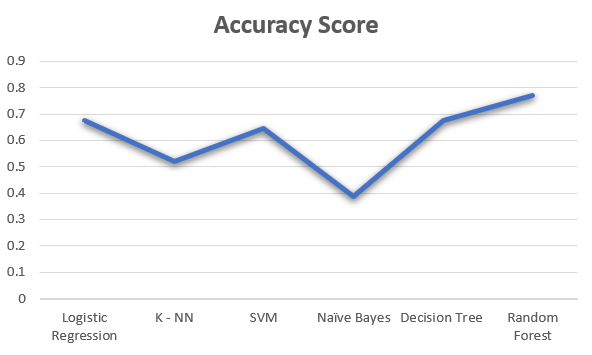

In [95]:
from IPython.display import Image
Image("/content/drive/My Drive/Classification/AccuracyScore.PNG")

Random Forest Classification Wins the race!

Please find the graph below which predicted the scores after the Grid Search. The best score for the models.

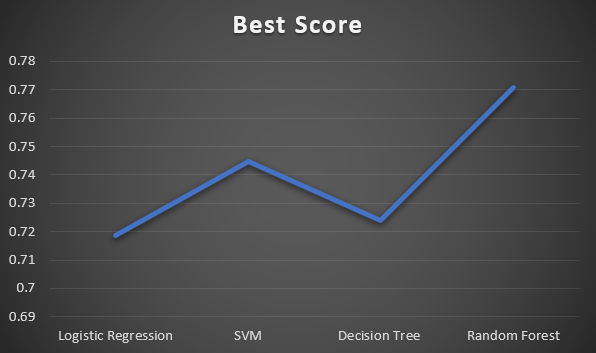

In [97]:
Image("/content/drive/My Drive/Classification/BestScore.PNG")

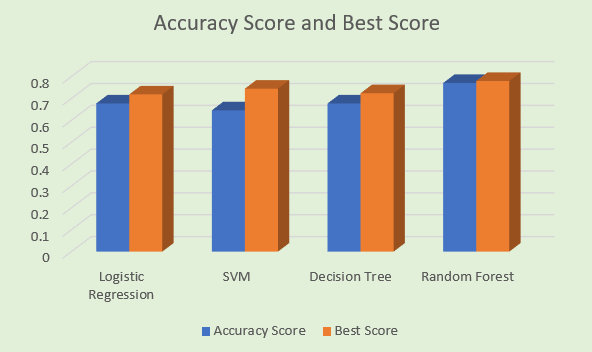

In [98]:
Image("/content/drive/My Drive/Classification/AccBestScore.PNG")

Hence, the results prove that the best model is Random Forest Classification

Lets get into Deep Learning for more Improvement

# Neural Networks

Now its the time for Neural Networks! Get Ready!

Necessary library files for Artificial Neural Networks

In [99]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

In [100]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [101]:
Y = pd.get_dummies(Y)

In [102]:
Y

,0,1,2
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
475,1,0,0
476,0,1,0
477,0,1,0
478,1,0,0


In [103]:
#Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [104]:
# Initialising the ANN
classifier = Sequential()

In [105]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 256, init = 'uniform', activation = 'relu', input_dim = 66))
classifier.add(Dropout(0.5))

In [106]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 256, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 256, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 256, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 256, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.5))

In [107]:
# Adding the output layer
#classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'sigmoid'))#85
classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'hard_sigmoid'))#85

In [108]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])#88.8

#classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])#88.8

In [109]:
# Fitting the ANN to the Training set
classifier.fit(train_X, train_Y, batch_size = 10, nb_epoch = 100)

Epoch 1/100
384/384 [==============================] - 1s 2ms/step - loss: 0.6455 - accuracy: 0.6641
Epoch 2/100
384/384 [==============================] - 0s 502us/step - loss: 0.6058 - accuracy: 0.6658
Epoch 3/100
384/384 [==============================] - 0s 510us/step - loss: 0.6034 - accuracy: 0.6701
Epoch 4/100
384/384 [==============================] - 0s 465us/step - loss: 0.5636 - accuracy: 0.6606
Epoch 5/100
384/384 [==============================] - 0s 482us/step - loss: 0.5502 - accuracy: 0.6788
Epoch 6/100
384/384 [==============================] - 0s 496us/step - loss: 0.5747 - accuracy: 0.6615
Epoch 7/100
384/384 [==============================] - 0s 485us/step - loss: 0.5358 - accuracy: 0.6901
Epoch 8/100
384/384 [==============================] - 0s 503us/step - loss: 0.5109 - accuracy: 0.7431
Epoch 9/100
384/384 [==============================] - 0s 465us/step - loss: 0.4773 - accuracy: 0.7595
Epoch 10/100
384/384 [==============================] - 0s 474us/step - los

In [110]:
# Predicting the Test set results
y_pred = classifier.predict(test_X)

In [111]:
results = classifier.evaluate(test_X,test_Y)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(
    test_Y.values.argmax(axis=1), y_pred.argmax(axis=1))
results

96/96 [==============================] - 0s 599us/step


[0.4569537738958995, 0.8472222685813904]

The results for the Neural Network:

The accuracy score is in the range between 0.84 and 0.90

Check the results above!

# Conclusion

When we compare all the Machine learning models with the neural network model, we got the best score for neural networks!

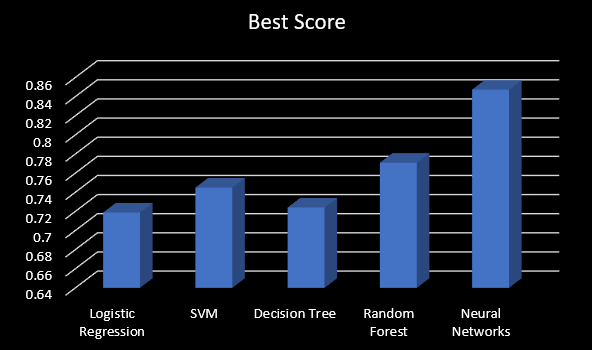

In [112]:
Image("/content/drive/My Drive/Classification/FinalScore.PNG")

The Student Dataset works best with Neural Networks.

# Neural Network Wins!